# Chapter 7 of the Syllabus Transient Groundwater Flow

@T.N.Olsthoorn, Dec. 2019

# Figures for chapter 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, convolve
from scipy.special import erfc, exp1
import pandas as pd
from dateutil.parser import parse
import pdb

In [2]:
def newfig(title='no title', xlabel='t [d]', ylabel='s [m]', xlim=None, ylim=None,
               xscale='linear', yscale='linear', size_inches=(14, 6)):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.grid(True)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    return ax

## Block response for river with sudden change of water level

$$\mathtt{BR}\left(\tau,\Delta\tau\right)=\mathtt{erfc}\left(\sqrt{\frac{x^{2}S}{4kD\tau}}\right)-\mathtt{erfc}\left(\sqrt{\frac{x^{2}S}{4kD\left(\tau-\Delta\tau\right)}}\right)\,\,\,\,\,\\\tau \ge \Delta \tau$$

In [3]:
def BRriver(tau, x, kD, S):
    '''Return block response for river level change
    parameters
    ----------
    tau: ndarray
        time after block response
    x: float
        distance from river
    kD, S: floats
        aquifer properties
    '''
    BR = erfc(np.sqrt((x ** 2 * S) / (4 * kD * tau)))
    BR[1:] -= BR[:-1]
    return BR

def IRriver(tau, x, kD, S):
    '''Return Impulse response for river level change
    parameters
    ----------
    tau: ndarray
        time after block response
    x: float
        distance from river
    kD, S: floats
        aquifer properties
    '''
    u = np.sqrt(x ** 2 * S / (4 * kD * tau))
    IR = u / (tau * np.sqrt(np.pi )) * np.exp(-u ** 2)
    return IR

In [4]:
# Get the Meuse water level data for station 'Eijsden'
from dateutil.parser import parse
import pandas as pd

eijs = pd.read_csv('NVT_WATHTE_EIJS.csv', sep=';', usecols=[0, 1, 4])

# Parse the data and time column to get a datetime index
eijs.index = [parse(d + ' ' + t, dayfirst=True) for d, t in zip(eijs['Datum'].values, eijs['Tijd'].values)]
eijs = eijs.drop(columns=['Datum', 'Tijd'])
eijs['Meting'] /= 100.

dtau = (eijs.index[1] - eijs.index[0]) / np.timedelta64(1, 'D')
tau =np.asarray(eijs.index - eijs.index[0]) / np.timedelta64(1, 'D')

/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


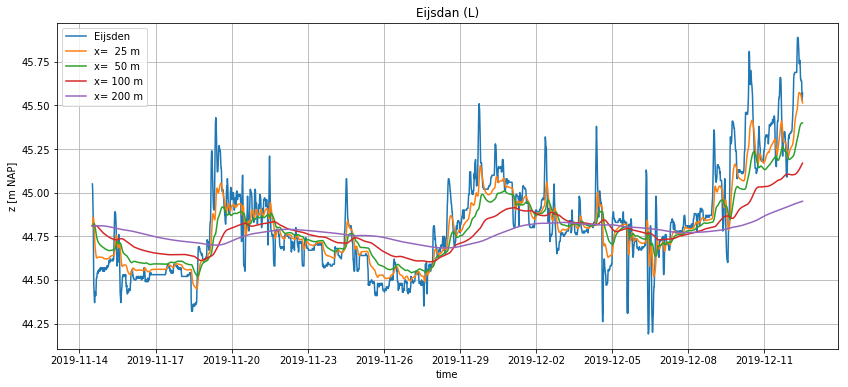

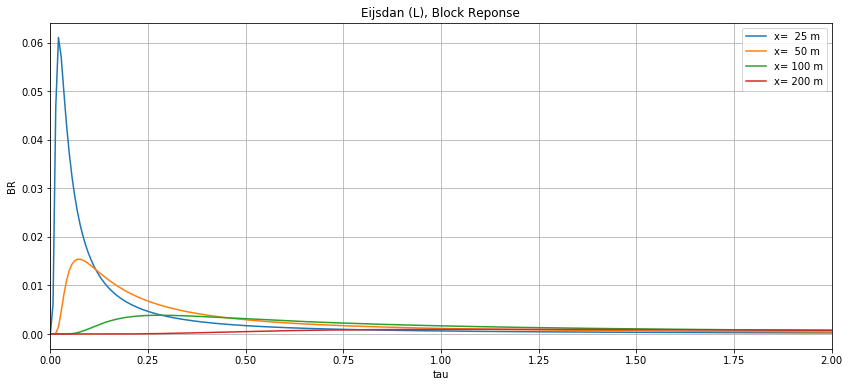

In [8]:
ax2 = newfig(title='Eijsdan (L)', xlabel='time', ylabel='z [m NAP]')
ax3 = newfig(title='Eijsdan (L), Block Reponse', xlabel='tau', ylabel='BR', xlim=(0, 2))

kD = 600 # m2/d
S = 0.1

ax2.plot(eijs.index, eijs['Meting'], label='Eijsden')
for x in [25, 50, 100, 200]:
    br = BRriver(tau, x, kD, S)
    ax2.plot(eijs.index, eijs['Meting'].mean() + lfilter(br, 1.,
                        eijs['Meting'] - eijs['Meting'].mean()), label='x={:4g} m'.format(x))
    ax3.plot(tau, br, label='x={:4g} m'.format(x))
ax2.legend()
ax3.legend()


# Show the difference between impulse response and block response for river stage


/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


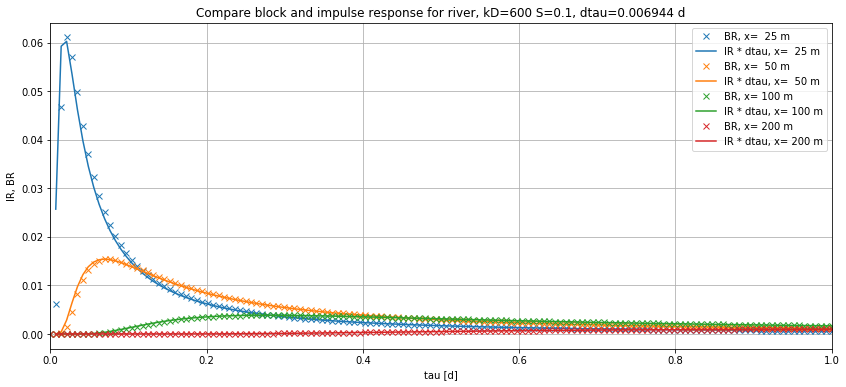

In [9]:
ax = newfig(title='Compare block and impulse response for river, kD={} S={}, dtau={:.4g} d'.format(kD, S, dtau),
      xlabel='tau [d]',ylabel='IR, BR', xlim=(0, 1))
for x in [25, 50, 100, 200]:
    BR = BRriver(tau, x=x, kD=kD, S=S)
    IR = IRriver(tau, x=x, kD=kD, S=S)
    l = ax.plot(tau, BR, 'x', mfc='none', label='BR, x={:4g} m'.format(x))
    ax.plot(tau, IR * dtau, '-', mfc='none', color=l[0].get_color(),label='IR * dtau, x={:4g} m'.format(x))
ax.legend()

# Images for the syllabus on convolution theory

For this we need a nice block response. The river respose for a distance of 50 m seems perfect

/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


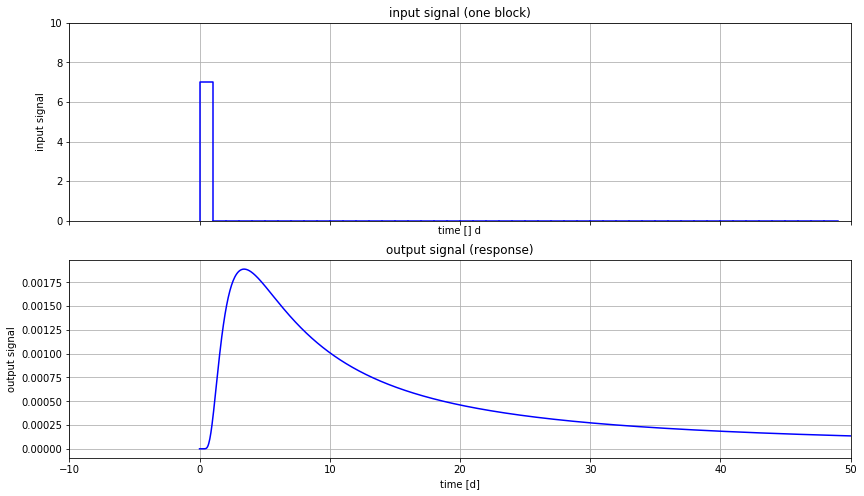

In [92]:
def mystep(x, y, ax, color='b'):
    for xi, xj, yi in zip(x[:-1], x[1:], y[:-1]):
        ax.plot([xi, xi, xj, xj], [0, yi, yi, 0], color)

kD = 600. # m2/d
S = 0.1 # [-]
x = 350 # m

dtau = 1/24. # d
tau = np.arange(0, 100, dtau, dtype=float) # in days
time = np.arange(50, dtype=float)
inp = np.random.randint(5, 10, len(time))
J = np.random.randint(0, len(inp) - 1, int(0.95 * len(inp)))
inp[J] = 0
inp[1:] = 0
inp[0] = 7.

titles = ['input signal (one block)', 'output signal (response)']
xlabels = ['time [] d', 'time [d]']
ylabels = ['input signal', 'output signal']


fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(14, 8)
for a, title, xlabel, ylabel in zip(ax, titles, xlabels, ylabels):
    a.set_title(title)
    a.set_title(title)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    a.grid()
ax[0].set_ylim((0, 10))
ax[0].set_xlim((-10, 50))

BR = BRriver(tau, x=x, kD=kD, S=S)
IR = IRriver(tau, x=x, kD=kD, S=S)
ax[1].plot(tau, BR, 'b', mfc='none', label='BR, x={:4g} m'.format(x))
mystep(time, inp, ax=ax[0])

/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


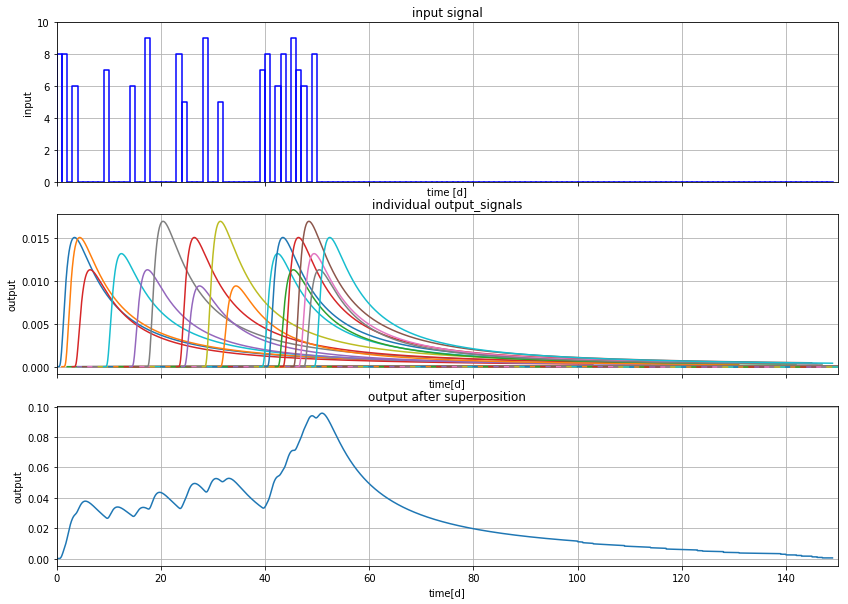

In [87]:
dtau = 1/24. # d
tau = np.arange(0, 100, dtau, dtype=float) # in days
time = np.arange(150, dtype=float)
inp = np.random.randint(5, 10, len(time))

titles = ['input signal', 'individual output_signals', 'output after superposition']
xlabels = ['time [d]', 'time[d]', 'time[d]']
ylabels = ['input', 'output', 'output']

th = np.arange(time[0], time[-1], dtau)

J = np.random.randint(0, len(inp) - 1, int(0.95 * len(inp)))
inp[J] = 0

inp[int(len(inp)/3):] = 0

fig, ax = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(14, 10)
for a, title, xlabel, ylabel in zip(ax, titles, xlabels, ylabels):
    a.set_title(title)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    a.grid()
ax[0].set_ylim((0, 10))
ax[0].set_xlim((0, 150))

for x in [350]:
    outp = np.zeros_like(th)
    BR = BRriver(tau, x=x, kD=kD, S=S)
    mystep(time, inp, ax=ax[0])
    for t, y in zip(time, inp):
        i1 = int(np.cumsum(th <= t)[-1])
        i2 = min(i1 + len(BR), len(th))
        ax[1].plot(t + tau, BR * y)
        outp[i1:i2]  += BR[:i2-i1] * y
    ax[2].plot(th, outp)


/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


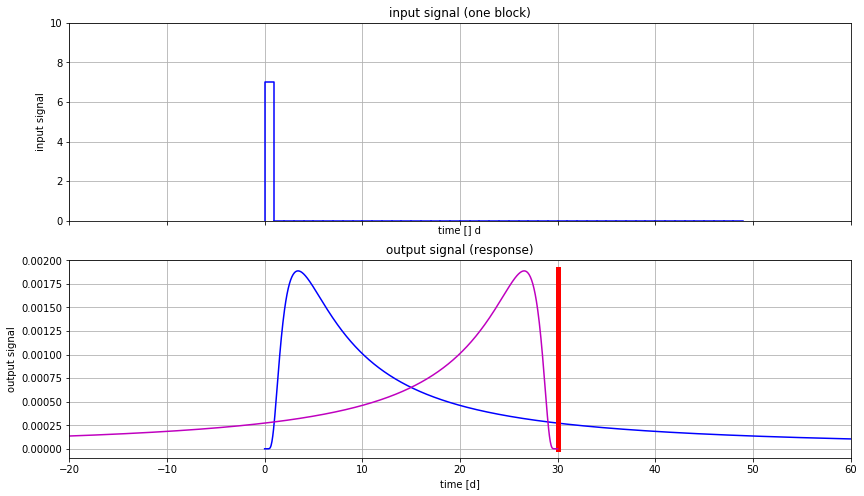

In [117]:
kD = 600. # m2/d
S = 0.1 # [-]
x = 350 # m

dtau = 1/24. # d
tau = np.arange(0, 100, dtau, dtype=float) # in days
time = np.arange(50, dtype=float)
inp = np.random.randint(5, 10, len(time))
J = np.random.randint(0, len(inp) - 1, int(0.95 * len(inp)))
inp[J] = 0
inp[1:] = 0
inp[0] = 7.

titles = ['input signal (one block)', 'output signal (response)']
xlabels = ['time [] d', 'time [d]']
ylabels = ['input signal', 'output signal']


fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(14, 8)
for a, title, xlabel, ylabel in zip(ax, titles, xlabels, ylabels):
    a.set_title(title)
    a.set_title(title)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    a.grid()
ax[0].set_ylim((0, 10))
ax[0].set_xlim((-20, 60))

BR = BRriver(tau, x=x, kD=kD, S=S)
IR = IRriver(tau, x=x, kD=kD, S=S)
ax[1].plot(tau, BR, 'b', mfc='none', label='BR, x={:4g} m'.format(x))
i = int(np.cumsum(tau <= 30)[-1])
ax[1].plot([30, 30], [0, 7 * BR[i]], 'r', lw=5, label='ouput at t=30')
ax[1].plot(30 - tau, BR, 'm', mfc='none', label='BR, x={:4g} m'.format(x))
mystep(time, inp, ax=ax[0])

/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


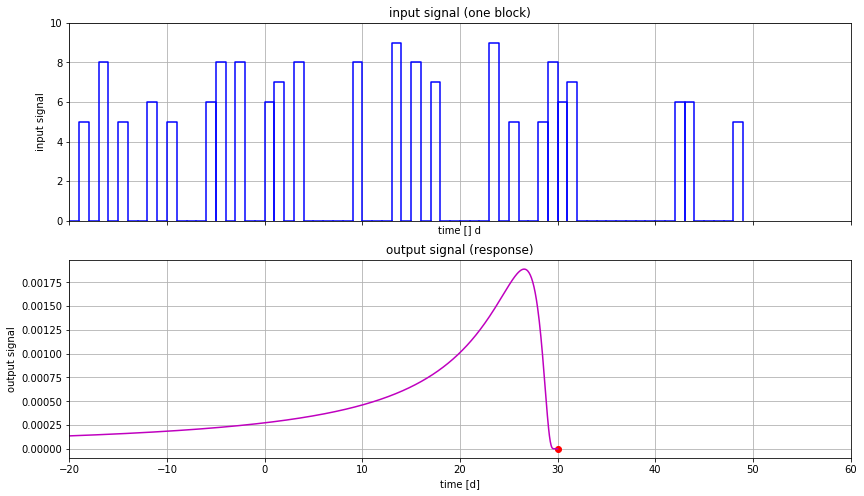

In [123]:
kD = 600. # m2/d
S = 0.1 # [-]
x = 350 # m

dtau = 1/24. # d
tau = np.arange(0, 100, dtau, dtype=float) # in days
time = np.arange(-20, 50, dtype=float)
inp = np.random.randint(5, 10, len(time))
J = np.random.randint(0, len(inp) - 1, int(0.95 * len(inp)))
inp[J] = 0

titles = ['input signal (one block)', 'output signal (response)']
xlabels = ['time [] d', 'time [d]']
ylabels = ['input signal', 'output signal']


fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(14, 8)
for a, title, xlabel, ylabel in zip(ax, titles, xlabels, ylabels):
    a.set_title(title)
    a.set_title(title)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    a.grid()
ax[0].set_ylim((0, 10))
ax[0].set_xlim((-20, 60))

BR = BRriver(tau, x=x, kD=kD, S=S)
IR = IRriver(tau, x=x, kD=kD, S=S)
#ax[1].plot(tau, BR, 'b', mfc='none', label='BR, x={:4g} m'.format(x))
i = int(np.cumsum(tau <= 30)[-1])
ax[1].plot([30], [0], 'ro', lw=5, label='ouput at t=30')
ax[1].plot(30 - tau, BR, 'm', mfc='none', label='BR, x={:4g} m'.format(x))
mystep(time, inp, ax=ax[0])

/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


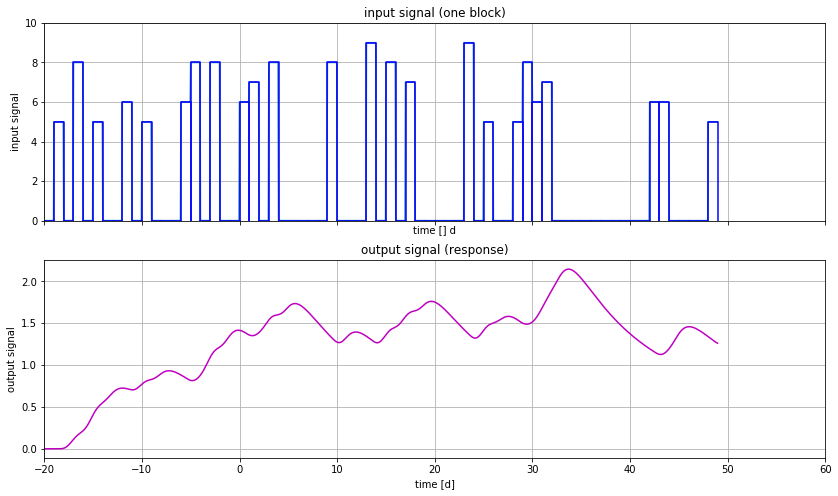

In [124]:
kD = 600. # m2/d
S = 0.1 # [-]
x = 350 # m

dtau = 1/24. # d
tau = np.arange(0, 100, dtau, dtype=float) # in days
time = np.arange(-20, 50, dtype=float)
#inp = np.random.randint(5, 10, len(time))
#J = np.random.randint(0, len(inp) - 1, int(0.95 * len(inp)))
#inp[J] = 0

titles = ['input signal (one block)', 'output signal (response)']
xlabels = ['time [] d', 'time [d]']
ylabels = ['input signal', 'output signal']


fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(14, 8)
for a, title, xlabel, ylabel in zip(ax, titles, xlabels, ylabels):
    a.set_title(title)
    a.set_title(title)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    a.grid()
ax[0].set_ylim((0, 10))
ax[0].set_xlim((-20, 60))

BR = BRriver(tau, x=x, kD=kD, S=S)
IR = IRriver(tau, x=x, kD=kD, S=S)

th = np.arange(time[0], time[-1], dtau)
inph = np.zeros_like(th)
for t, y in zip(time, inp):
    inph[th > t] = y

y = lfilter(BR, 1., inph)

ax[0].plot(th, inph)
#ax[1].plot(tau, BR, 'b', mfc='none', label='BR, x={:4g} m'.format(x))
i = int(np.cumsum(tau <= 30)[-1])
#ax[1].plot([30, 30], [0, BR[i]], 'r', lw=5, label='ouput at t=30')
ax[1].plot(th, y, 'm')
mystep(time, inp, ax=ax[0])

In [114]:
th

array([-20.        , -19.95833333, -19.91666667, -19.875     ,
       -19.83333333, -19.79166667, -19.75      , -19.70833333,
       -19.66666667, -19.625     , -19.58333333, -19.54166667,
       -19.5       , -19.45833333, -19.41666667, -19.375     ,
       -19.33333333, -19.29166667, -19.25      , -19.20833333,
       -19.16666667, -19.125     , -19.08333333, -19.04166667])

AttributeError: 'AxesSubplot' object has no attribute 'secondary_xaxis'

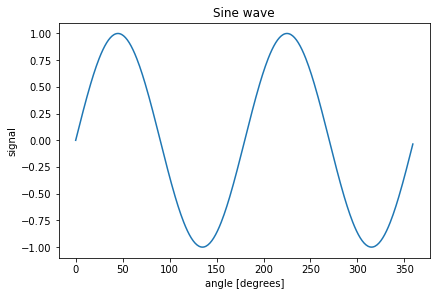

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)

fig, ax = plt.subplots(constrained_layout=True)
x = np.arange(0, 360, 1)
y = np.sin(2 * x * np.pi / 180)
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')


def deg2rad(x):
    return x * np.pi / 180


def rad2deg(x):
    return x * 180 / np.pi

secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')
plt.show()


# Convolution with Theis wells

In [245]:
def BRtheis(tau, r, kD, S):
    u = r ** 2 * S /(4 * kD * tau)
    BR = exp1(u)
    BR[1:] -= BR[:-1]
    return BR

/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/Users/Theo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


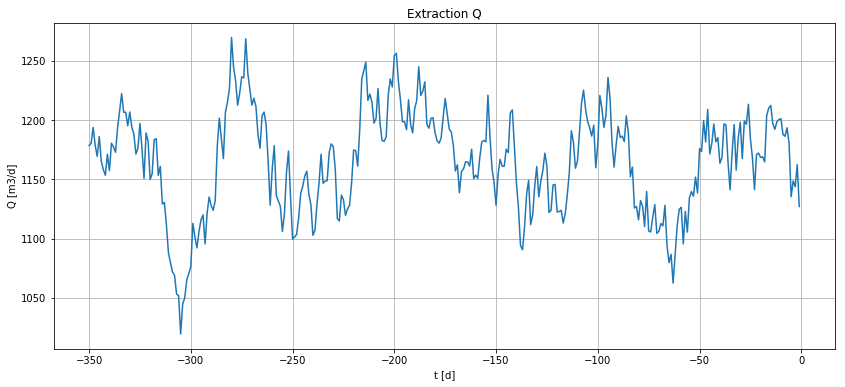

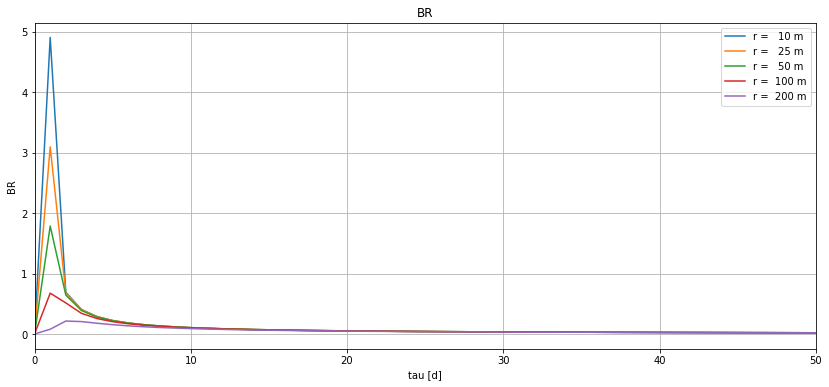

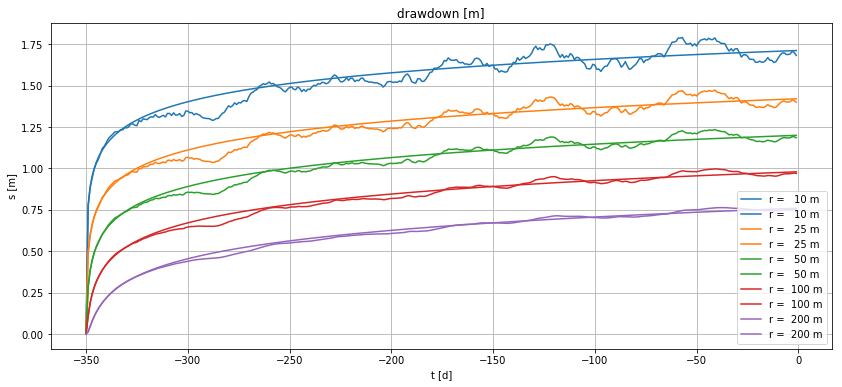

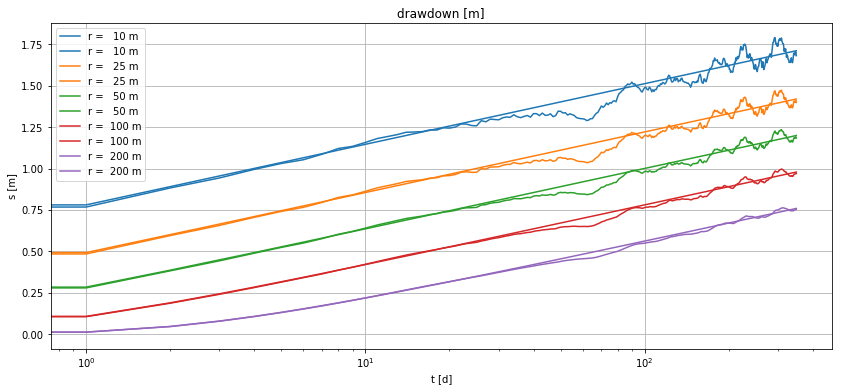

In [254]:
# Gererate some more or less random input
Q0 = 1200. # m3/d
kD = 600 # m2/d
S = 0.1 # [-]

t = np.arange(-350, 0, 1. ) # past time in days
Qt  = Q0 * (1 + lfilter(np.ones(25)/25., 1., np.random.rand(len(t)) - 0.5))

dtau = np.diff(t)[0]
tau = t - t[0]

r = [10, 25, 50, 100, 200] # m

ax0 = newfig(title='Extraction Q', xlabel='t [d]', ylabel='Q [m3/d]')
ax1 = newfig(title='BR', xlabel='tau [d]', ylabel='BR', xlim=(0, 50))
ax2 = newfig(title='drawdown [m]', xlabel='t [d]', ylabel='s [m]')
ax3 = newfig(title='drawdown [m]', xlabel='t [d]', ylabel='s [m]', xscale='log')
ax0.plot(t, y, label='signal Qt')

#Qt = np.ones_like(t) * Q0

for ri in r:
    u = ri ** 2 * S /(4 * kD * (t - t[0]))
    br = BRtheis(tau, ri, kD, S)
    ax1.plot(tau, br, label='r = {:4g} m'.format(ri))
    l = ax2.plot(t, lfilter(br, 1., Qt / (4 * np.pi * kD)), label='r = {:4g} m'.format(ri))
    ax2.plot(t, Q0 / (4 * np.pi * kD) * exp1(u), l[0].get_color(), label='r = {:4g} m'.format(ri))
    
    l = ax3.plot(t - t[0], lfilter(br, 1., Qt / (4 * np.pi * kD)), label='r = {:4g} m'.format(ri))
    ax3.plot(t - t[0], Q0 / (4 * np.pi * kD) * exp1(u), l[0].get_color(), label='r = {:4g} m'.format(ri))
ax1.legend()
ax2.legend()
ax3.legend()

# Groundwater head in a basin between straight canals

$$\mathtt{IR}\left(\tau\right)=\frac{1}{S}\,\frac{4}{\pi}\sum_{j=1}^{\infty}\left\{ \frac{\left(-1\right)^{j-1}}{2j-1}\cos\left[\left(2j-1\right)\left(\frac{\pi}{2}\right)\frac{x}{b}\right]\exp\left[-\left(2j-1\right)^{2}\left(\frac{\pi}{2}\right)^{2}\frac{kD}{b^{2}S}t\right]\right\} $$

In [126]:
def IRbasin(tau, x=None, b=None, kD=None, S=None):
    T = b ** 2 * S / kD
    s = np.zeros_like(tau)
    for j in range(1, 20):
        j2p = (2 * j - 1) * (np.pi / 2)        
        s += (-1) ** (j - 1) / (2 * j - 1) * np.cos(j2p * x / b) * np.exp(- j2p ** 2 * tau / T)
    return s * 4 / (np.pi * S)        

/Users/Theo/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


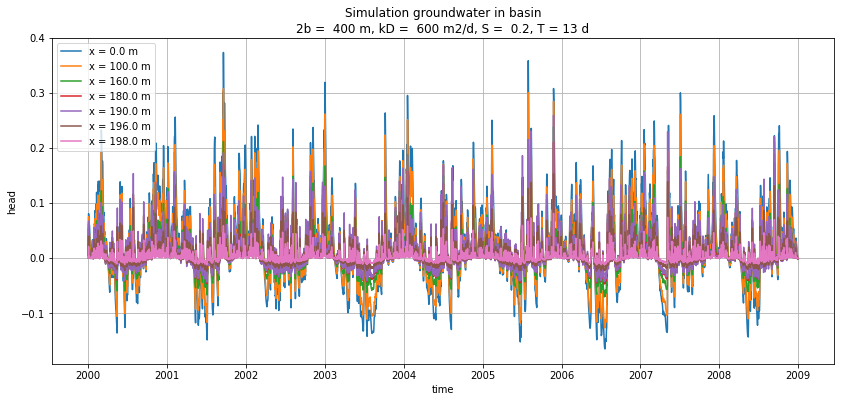

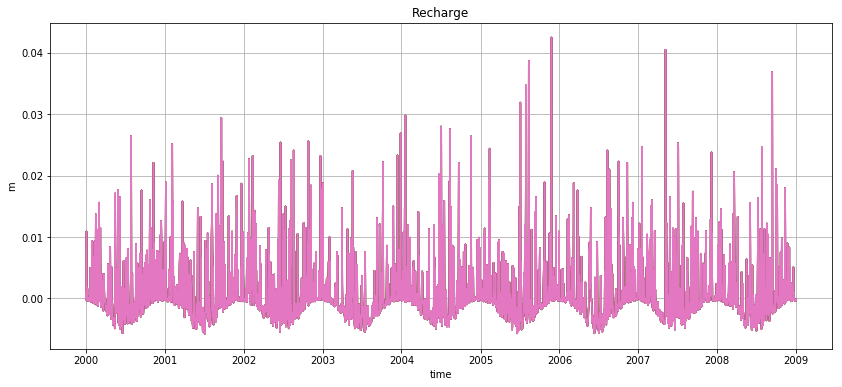

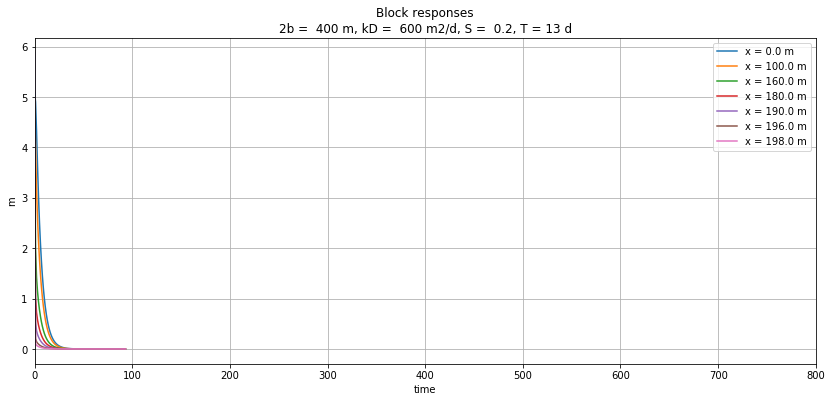

In [133]:
kD = 600 # m2/d
S = 0.2
b = 200 # m
x = b * np.array([0, 0.5, 0.8, 0.9, 0.95, 0.98, 0.99])
T = b ** 2 * S / kD

PE = pd.read_csv('PE-00-08.txt', index_col=0, parse_dates=True, dayfirst=True)
PE /= 1000. # convert all to mm/d

dtau = (PE.index[1] - PE.index[0]) / np.timedelta64(1, 'D')
tau = np.arange(0, 7 * T, dtau)

title=  '2b = {:4g} m, kD = {:4g} m2/d, S = {:4g}, T = {:.0f} d'.format(2 * b, kD, S, T)
ax0 = newfig(title='Simulation groundwater in basin\n' + title, xlabel='time', ylabel='head')
ax1 = newfig(title='Recharge', xlabel='time', ylabel='m')
ax2 = newfig(title='Block responses\n' + title, xlabel='time', ylabel='m', xlim=(0, 800))

for xi in x:
    BR = dtau * IRbasin(tau, x=xi, b=b, kD=kD, S=S)
    ax0.plot(PE.index, lfilter(BR, 1, PE['P'] - PE['E']), label='x = {} m'.format(xi))
    ax1.plot(PE.index, PE['P'] - PE['E'])
    ax2.plot(tau, BR, label='x = {} m'.format(xi))
ax0.legend()
ax2.legend()
    
